## Coding Interview by Clinical Informatics & Data Science Team

Thank you for participating in Freenome’s coding test. You have one hour to complete the problems using only numpy, pandas, matplotlib or other built-in python packages. Please refrain from using the internet to search for answers.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

### 1. Valid Palindrome
A palindrome is a word that can be read the same both ways - forward and backward after converting all uppercase letters into lowercase letters and removing all non-alphanumeric characters. For example, '#Abba_' is a palindrome and 'ab-c' is not.

#### Q1. Write a function to check whether a string is a palindrome

In [32]:
def is_palindrome(s: str) -> bool:
    """give a string, return True if s is a palindrome, otherwise return false"""
    # your codes:

    #set to lower case
    lower_string = s.lower()
    #init
    init_str = ''
    #iterate through the lower case string
    for i in range(len(lower_string)):
      #check the character
      if lower_string[i].isalnum():
        #attach
        init_str = init_str + lower_string[i]
    #flip the string
    final_str = ''
    for i in range(len(init_str), 0, -1):
      #update
      final_str = final_str + init_str[i-1]

    #check if init_string is equal to final string
    if init_str == final_str:
      #palindrome
      return True
    else:
      #not palindrome
      return False

##### Test cases

In [33]:
is_palindrome('#Abba_') # should return True

True

In [34]:
is_palindrome('ab-c') # should return False

False

#### Q2. Given a list of strings, please filter strings that are valid palindromes using `is_palindrome` function

In [36]:
words = [" ", "0P", "aaaaaAA", "Bb#Aa", " 12344321", "Race A#ecaR"]

In [37]:
# your codes:

#init
palindromes = []

#init
for word in words:
  #if true
  if is_palindrome(word):
    #append
    palindromes.append(word)

#print
print(palindromes)

[' ', 'aaaaaAA', ' 12344321', 'Race A#ecaR']


### 2. Clinical Data Analysis 

Site enrollment is critical to any clinical trials. In this section, you will be given a dataset containing enrollment information to perform an analysis. The below is a description of each column in the dataset.
| Column     | Description |
| ----------- | ----------- |
| SiteID     | 1-10 (inclusive)       |
| SubjectID   | Sequential Number within a site  |
| SubjectStatus   | 'Enrolled' or 'Discontinued'  |
| EnrollmentDate   | 2010-07-01 to 2015-07-01  |
| Cohort  | 'Lung Cancer', 'Pancreatic Cancer', 'Liver Cancer', or 'Control'  |

In [39]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [130]:
dat = pd.read_csv('enrollment.csv')
dat.head()
#subject id is unique for site id

,SiteID,SubjectID,SubjectStatus,EnrollmentDate,Cohort
0,1,1,Enrolled,2010-10-20,Lung Cancer
1,1,2,Discontinued,2011-03-27,Lung Cancer
2,1,3,Enrolled,2011-05-20,Pancreatic Cancer
3,1,4,Enrolled,2011-11-03,Control
4,1,5,Enrolled,2011-11-09,Control


#### Q3. Which site has the highest enrollment for lung cancer between 2010 and 2013 (inclusive) excluding the discontinued subjects?

In [129]:
# your codes

#get date info
def enrolled_time(row):
  #for one sample
  year, month, day = row['EnrollmentDate'].rsplit('-')
  #cast
  year = int(year)
  #check the year
  if year >= 2010 and year <= 2013:
    return True
  else:
    return False

#remove the discontinued subjects and those with lung cancer
df = dat[(dat['SubjectStatus'] != 'Discontinued') & (dat['Cohort'] == 'Lung Cancer')]

#now need to find those between 2010 and 2013
df['Correct_Years'] = df.apply(enrolled_time, axis = 1)
#now take only the True
df = df[df['Correct_Years'] == True]
#get the site ids (site ID has the highest count)
print(df['SiteID'].value_counts())

5     16
4     12
8     12
10    11
6      8
3      7
9      7
2      5
7      5
1      4
Name: SiteID, dtype: int64


<ipython-input-129-389fa5e21bd7>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Correct_Years'] = df.apply(enrolled_time, axis = 1)


Site ID 5 has the highest enrollment. 

#### Q4. Please calculate enrollment rate for each cohort by site. 
##### The enrollment rate is calculated by dividing the number of subjects enrolled by the number of months of enrollment time. You can include both enrolled and discontinued subjects in your analysis.

In [87]:
#enrollment rate
def enrollment_rate(enrolled_last_patient, enrolled_first_patient, num_patients):
  #get info for the last patient
  year2, month2, _ = enrolled_last_patient.rsplit('-')
  #get info on the first patient
  year1, month1, _ = enrolled_first_patient.rsplit('-')
  #convert
  time2 = int(year2) * 12 + int(month2)
  #convert
  time1 = int(year1) * 12 + int(month1)
  #calc
  return (time2 - time1) / num_patients

#collect
patient_info = []

#iterate across site
for i in dat['SiteID'].unique():
  #subset by site id
  df_small = dat[dat['SiteID'] == i]
  #iterate across cohort
  for disease in df_small['Cohort'].unique():
    #subset by disease
    df_tiny = df_small[df_small['Cohort'] == disease]
    #first patient info
    patient1 = df_tiny['EnrollmentDate'].iloc[0]
    #last patient info
    patient2 = df_tiny['EnrollmentDate'].iloc[-1]
    #compute
    enroll_rate = enrollment_rate(patient2, patient1, len(df_tiny))
    #append
    patient_info.append([i, disease, enroll_rate])

visualize = pd.DataFrame(patient_info, columns = ['SiteID', 'Cohort', 'Enroll_Rate'])
visualize

,SiteID,Cohort,Enroll_Rate
0,1,Lung Cancer,6.111111
1,1,Pancreatic Cancer,13.000000
2,1,Control,4.200000
3,2,Pancreatic Cancer,9.500000
4,2,Control,5.714286
5,2,Lung Cancer,5.250000
6,2,Liver Cancer,0.000000
7,3,Lung Cancer,3.562500
8,3,Control,4.076923
9,3,Liver Cancer,3.500000


#### Q5. Please visualize the number of subjects enrolled over time for each cohort (excluding the discontinued subjects).

<Axes: xlabel='EnrollmentDate', ylabel='SubjectID'>

<Figure size 3000x1500 with 0 Axes>

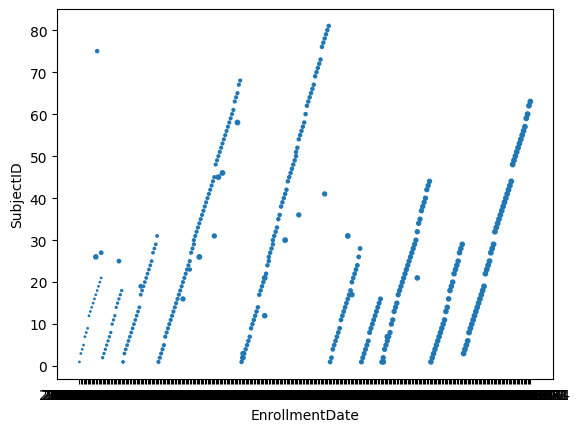

In [131]:
# your code

#remove the discontinued subjects
df = dat[(dat['SubjectStatus'] != 'Discontinued')]

#plotting
plt.figure(figsize = (30, 15)) #this still considers the discontinued patients
df.plot.scatter(x = 'EnrollmentDate', y = 'SubjectID', s = 'SiteID')

#### Q6. Our study procedure requires a 1:1 matching between cancer and control subjects. Please calculate the ratio of the number of cancer subjects to control subjects for each site and rank them from highest to lowest.
##### 1:1 matching means that the number of cancer subjects is equal to the number of control subjects.

In [128]:
#get ratio
def cancer_control_ratio(num_cancer, num_control):
  return num_cancer/num_control

#collect
patient_info = []

#iterate across site
for i in dat['SiteID'].unique():
  #subset by site id
  df_small = dat[dat['SiteID'] == i]
  #check
  num_cancer = 0
  num_control = 0
  #iterate across cohort
  for disease in df_small['Cohort'].unique():
    #subset by disease
    df_tiny = df_small[df_small['Cohort'] == disease]
    #check if cancer
    if 'Cancer' in disease:
      num_cancer = num_cancer + len(df_tiny)
    else:
      #control
      num_control = num_control + len(df_tiny)
  #append
  ratio = cancer_control_ratio(num_cancer, num_control)
  patient_info.append([i, ratio])

#set
visualize = pd.DataFrame(patient_info, columns = ['SiteID', 'Cancer_Control_Ratio'])
#rank
df_summary = visualize.sort_values(by = ['Cancer_Control_Ratio'], ascending = False)
#print
df_summary

,SiteID,Cancer_Control_Ratio
6,7,2.200000
1,2,1.571429
2,3,1.384615
0,1,1.100000
3,4,1.090909
4,5,1.025000
7,8,1.000000
8,9,0.812500
5,6,0.750000
9,10,0.657895
